In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
df = pd.read_csv('50_Startups.csv')

# Selección de Xi e y. Mediante iloc y slicing
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [7]:
X = df[["R&D Spend","Administration","Marketing Spend","State"]]

y = df["Profit"]

X.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [8]:
X.shape

(50, 4)

# Codifiquemos los datos categóricos (State)

In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(sparse_output=False), ["State"])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
np.set_printoptions(suppress=True)  # Para que no muestre números con notación científica

print(X)

[[     0.        0.        1.   165349.2  136897.8  471784.1 ]
 [     1.        0.        0.   162597.7  151377.59 443898.53]
 [     0.        1.        0.   153441.51 101145.55 407934.54]
 [     0.        0.        1.   144372.41 118671.85 383199.62]
 [     0.        1.        0.   142107.34  91391.77 366168.42]
 [     0.        0.        1.   131876.9   99814.71 362861.36]
 [     1.        0.        0.   134615.46 147198.87 127716.82]
 [     0.        1.        0.   130298.13 145530.06 323876.68]
 [     0.        0.        1.   120542.52 148718.95 311613.29]
 [     1.        0.        0.   123334.88 108679.17 304981.62]
 [     0.        1.        0.   101913.08 110594.11 229160.95]
 [     1.        0.        0.   100671.96  91790.61 249744.55]
 [     0.        1.        0.    93863.75 127320.38 249839.44]
 [     1.        0.        0.    91992.39 135495.07 252664.93]
 [     0.        1.        0.   119943.24 156547.42 256512.92]
 [     0.        0.        1.   114523.61 122616.84 261

# Dividir los datos.
Generemos el conjunto de entrenamiento y el conjunto de prueba

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Generamos el modelo y lo entrenamos


In [11]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

# Probemos el conjunto de prueba


In [12]:
y_pred = regressor.predict(X_test)
#np.set_printoptions(precision=2)

print(X_test)

print(y_test,y_pred)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[     0.        1.        0.    66051.52 182645.56 118148.2 ]
 [     1.        0.        0.   100671.96  91790.61 249744.55]
 [     0.        1.        0.   101913.08 110594.11 229160.95]
 [     0.        1.        0.    27892.92  84710.77 164470.71]
 [     0.        1.        0.   153441.51 101145.55 407934.54]
 [     0.        0.        1.    72107.6  127864.55 353183.81]
 [     0.        0.        1.    20229.59  65947.93 185265.1 ]
 [     0.        0.        1.    61136.38 152701.92  88218.23]
 [     0.        1.        0.    73994.56 122782.75 303319.26]
 [     0.        1.        0.   142107.34  91391.77 366168.42]]
28    103282.38
11    144259.40
10    146121.95
41     77798.83
2     191050.39
27    105008.31
38     81229.06
31     97483.56
22    110352.25
4     166187.94
Name: Profit, dtype: float64 [103015.20159795 132582.27760816 132447.73845175  71976.09851258
 178537.48221057 116161.24230167  67851.69209676  98791.73374687
 113969.43533014 167921.06569552]


# Curiosidades adicionales

In [14]:
X

array([[     0.  ,      0.  ,      1.  , 165349.2 , 136897.8 , 471784.1 ],
       [     1.  ,      0.  ,      0.  , 162597.7 , 151377.59, 443898.53],
       [     0.  ,      1.  ,      0.  , 153441.51, 101145.55, 407934.54],
       [     0.  ,      0.  ,      1.  , 144372.41, 118671.85, 383199.62],
       [     0.  ,      1.  ,      0.  , 142107.34,  91391.77, 366168.42],
       [     0.  ,      0.  ,      1.  , 131876.9 ,  99814.71, 362861.36],
       [     1.  ,      0.  ,      0.  , 134615.46, 147198.87, 127716.82],
       [     0.  ,      1.  ,      0.  , 130298.13, 145530.06, 323876.68],
       [     0.  ,      0.  ,      1.  , 120542.52, 148718.95, 311613.29],
       [     1.  ,      0.  ,      0.  , 123334.88, 108679.17, 304981.62],
       [     0.  ,      1.  ,      0.  , 101913.08, 110594.11, 229160.95],
       [     1.  ,      0.  ,      0.  , 100671.96,  91790.61, 249744.55],
       [     0.  ,      1.  ,      0.  ,  93863.75, 127320.38, 249839.44],
       [     1.  ,      0

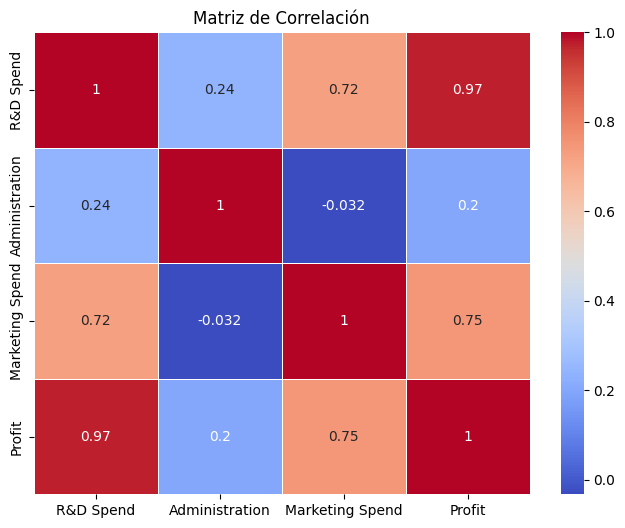

In [17]:
import seaborn as sns

df2 = df[["R&D Spend","Administration","Marketing Spend","Profit"]]

df2
corr = df2.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

In [20]:
print(regressor.coef_)

[  86.63836918 -872.64579088  786.0074217     0.77346719    0.0328846
    0.03661003]
